## 在构建模型前归一化

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os,sys,time
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_valid, X_train = X_train[:5000],X_train[5000:]
y_valid, y_train = y_train[:5000],y_train[5000:]

In [18]:
# x = (x - u) / std
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train.astype(np.float32))

StandardScaler()

In [19]:
X_train_std = std_scaler.transform(X_train.astype(np.float32)).reshape(X_train.shape[0],28,28)
X_valid_std = std_scaler.transform(X_valid.astype(np.float32)).reshape(X_valid.shape[0],28,28)
X_test_std = std_scaler.transform(X_test.astype(np.float32)).reshape(X_test.shape[0],28,28)

In [5]:
# 使用sequential
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# relu y = max(0,x)
# softmax: 将向量变成概率分布。 x= [x1,x2,x3]
#          y=[e^x1/sum, e^x2/sum, e^x3/sum] sum = e^x1, e^x2, e^x3

#reason for sparse: y->index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

2021-07-24 17:23:26.186010: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
#关于全连接层参数量的解释，第一个全连接层为例
#[None, 784]* W +b =[None, 300] W.shape=[784, 300], b=[300]
# 784*300 + 300 = 235500

In [9]:
X_train.shape

(55000, 784)

In [20]:
history = model.fit(X_train_std, y_train, epochs=5,
         validation_data=(X_valid_std, y_valid))

Epoch 1/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1644 - accuracy: 0.9383 - val_loss: 0.4217 - val_accuracy: 0.8800
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1519 - accuracy: 0.9433 - val_loss: 0.3832 - val_accuracy: 0.8900
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1445 - accuracy: 0.9462 - val_loss: 0.3985 - val_accuracy: 0.8864
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1368 - accuracy: 0.9480 - val_loss: 0.4172 - val_accuracy: 0.8922
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1305 - accuracy: 0.9520 - val_loss: 0.4340 - val_accuracy: 0.8856


In [ ]:
history.history

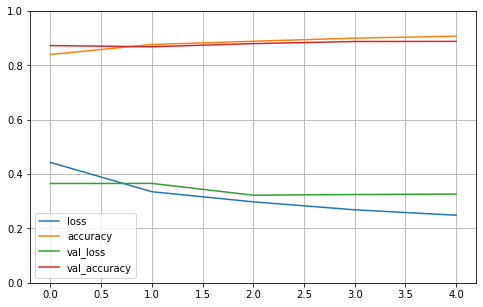

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [22]:
model.evaluate(X_test_std,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4771 - accuracy: 0.8781


[0.47710874676704407, 0.8780999779701233]